<a href="https://colab.research.google.com/github/SaiButhongyou/229352-StatisticalLearning/blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

- AdaBoost. Grid search over `n_estimators` and `learning_rate`.
- XGBoost. Grid search over `n_estimators`, `max_depth` and `learning_rate`.
- LightGBM. Grid search over `n_estimators`, `max_depth` and `learning_rate`.

In [1]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.38795887, 0.55371145])

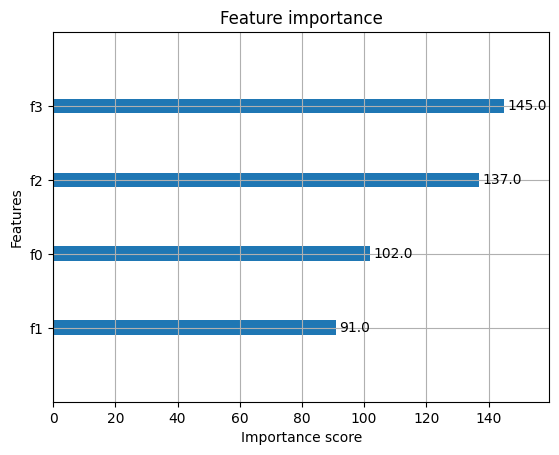

In [3]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


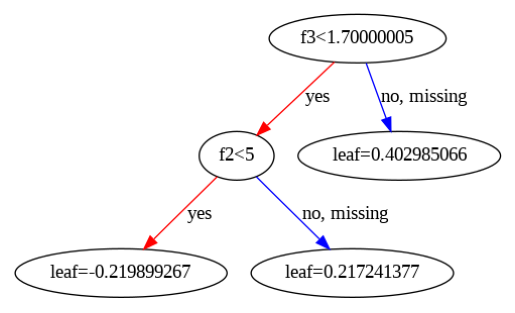

In [5]:
from xgboost import plot_tree

plot_tree(model, num_trees=2);

In [6]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)
X_test=pd.read_csv('X_test.csv', header=None)
y_test=pd.read_csv('y_test.csv', header=None)


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ab = AdaBoostClassifier(random_state=42)

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ab = GridSearchCV(ab, param_grid_ab, cv=5, scoring='accuracy', n_jobs=-1)
grid_ab.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [8]:

print(grid_ab.best_score_)

0.8441860465116278


In [19]:
print(grid_ab.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}


In [9]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:41:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [10]:
print(grid_xgb.best_score_)

0.8299003322259135


In [20]:
print(grid_xgb.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [11]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [-1, 5, 10], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [12]:
print(grid_lgbm.best_score_)

0.8017718715393134


In [21]:
print(grid_lgbm.best_params_)

{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}


best model = AdaBoost

In [13]:
models = {
    "AdaBoost": grid_ab,
    "XGBoost": grid_xgb,
    "LightGBM": grid_lgbm
}

best_model_name = max(models, key=lambda k: models[k].best_score_)
best_model = models[best_model_name].best_estimator_

print("Best model:", best_model_name)
print("Best CV score:", models[best_model_name].best_score_)


Best model: AdaBoost
Best CV score: 0.8441860465116278


In [32]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(test_accuracy)


0.8461538461538461


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        41
         1.0       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



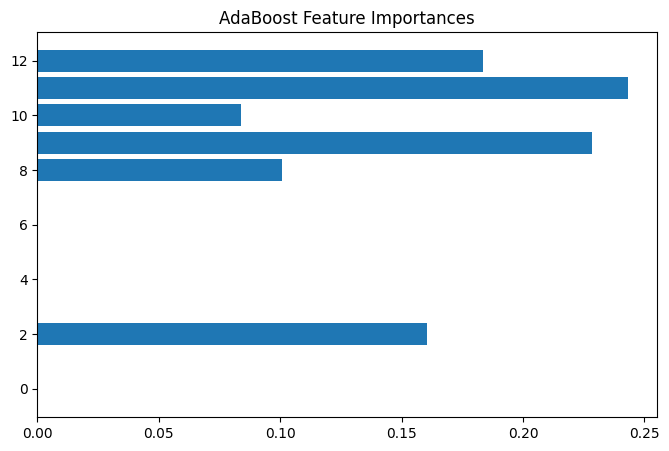

In [14]:
import matplotlib.pyplot as plt
best_ab = grid_ab.best_estimator_
plt.figure(figsize=(8,5))
plt.barh(X_train.columns, best_ab.feature_importances_)
plt.title("AdaBoost Feature Importances")
plt.show()

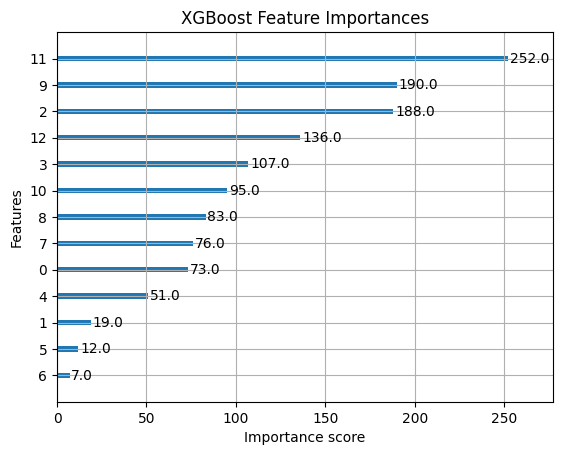

In [15]:
best_xgb = grid_xgb.best_estimator_
plot_importance(best_xgb)
plt.title("XGBoost Feature Importances")
plt.show()


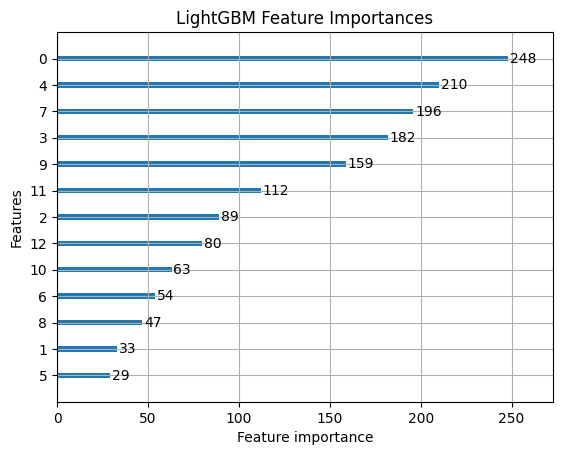

In [16]:
import lightgbm as lgb

best_lgbm = grid_lgbm.best_estimator_
lgb.plot_importance(best_lgbm)
plt.title("LightGBM Feature Importances")
plt.show()
